In [9]:
import numpy as np
import seaborn as sns
import pandas as pd

In [10]:
data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Sampling\Creditcard_data.csv")


In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
class_count_0, class_count_1 = data['Class'].value_counts()

class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)


class 0: (763, 31)
class 1: (9, 31)


<Axes: xlabel='Class', ylabel='count'>

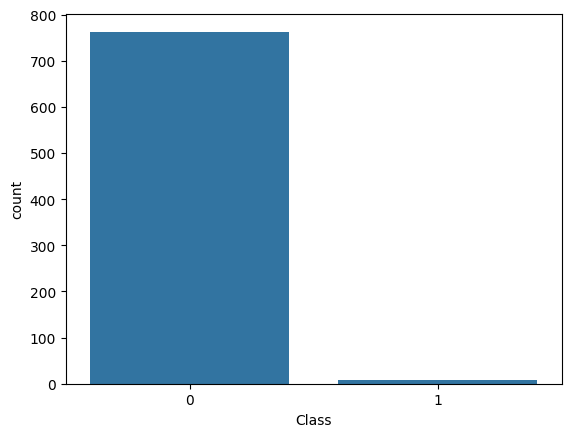

In [21]:
sns.barplot(x= temp['Class'] ,y= temp['count'])

In [24]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier  

X = data.drop('Class', axis=1)
y = data['Class']

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)





In [25]:
temp1 = resampled_df['Class'].value_counts().reset_index()
temp1

,Class,count
0,0,763
1,1,763


<Axes: xlabel='Class', ylabel='count'>

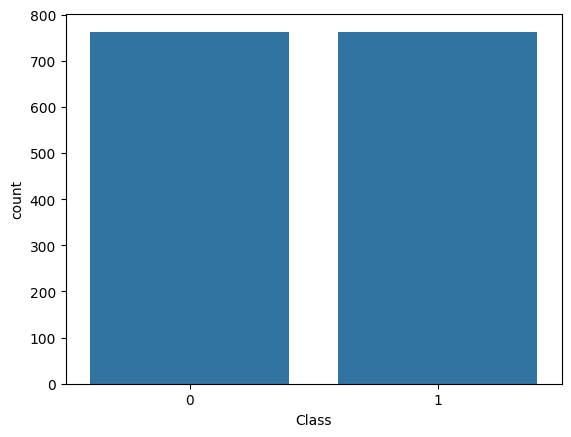

In [26]:
sns.barplot(x= temp1['Class'] ,y= temp1['count'])

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, EditedNearestNeighbours, InstanceHardnessThreshold
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.95, 0.05], random_state=42)
sample_size = len(X) // 5

samples = [X[:sample_size], X[sample_size:2*sample_size], X[2*sample_size:3*sample_size], 
           X[3*sample_size:4*sample_size], X[4*sample_size:]]

sample_train_test = [(train_test_split(sample_X, y[:sample_size], test_size=0.2, random_state=42)) for sample_X in samples]

models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    KNeighborsClassifier()
]
model_names = [model.__class__.__name__ for model in models]

sampling_techniques = {
    'RandomOverSampler': RandomOverSampler(),
    'SMOTE': SMOTE(),
    'EasyEnsemble': EasyEnsembleClassifier(n_estimators=10, random_state=42), 
    'ClusterCentroids': ClusterCentroids(),
    'EditedNearestNeighbours': EditedNearestNeighbours(),
    'InstanceHardnessThreshold': InstanceHardnessThreshold()
}
sampling_names = [sampler.__class__.__name__ for sampler in sampling_techniques.values()]

accuracy_df = pd.DataFrame(columns=['Model'] + sampling_names)
for i, (X_train, X_test, y_train, y_test) in enumerate(sample_train_test):
    print(f"\nSample {i+1}:")
    accuracies = []
    for sampler, sampler_name in zip(sampling_techniques.values(), sampling_names):
        if sampler_name == 'EasyEnsembleClassifier':
            # For EasyEnsembleClassifier
            model = sampler
            model.fit(X_train, y_train)
        else:
            # For other samplers,we use fit_resample
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
            model = models[i % len(models)]  
            model.fit(X_resampled, y_resampled)
        accuracy = model.score(X_test, y_test)
        accuracies.append(accuracy)
    accuracy_df.loc[i] = [model_names[i % len(models)]] + accuracies

print(accuracy_df.reset_index())

accuracy_df.to_csv('accuracy_results.csv', index=False)




Sample 1:

Sample 2:

Sample 3:

Sample 4:

Sample 5:
   index                       Model  RandomOverSampler  SMOTE  \
0      0      DecisionTreeClassifier              0.950  0.925   
1      1      RandomForestClassifier              0.975  0.950   
2      2                         SVC              0.975  0.950   
3      3  GradientBoostingClassifier              0.925  0.850   
4      4        KNeighborsClassifier              0.900  0.700   

   EasyEnsembleClassifier  ClusterCentroids  EditedNearestNeighbours  \
0                   0.850             0.850                    0.925   
1                   0.725             0.475                    0.975   
2                   0.550             0.250                    0.975   
3                   0.350             0.675                    0.925   
4                   0.400             0.975                    0.975   

   InstanceHardnessThreshold  
0                      0.850  
1                      0.675  
2                     

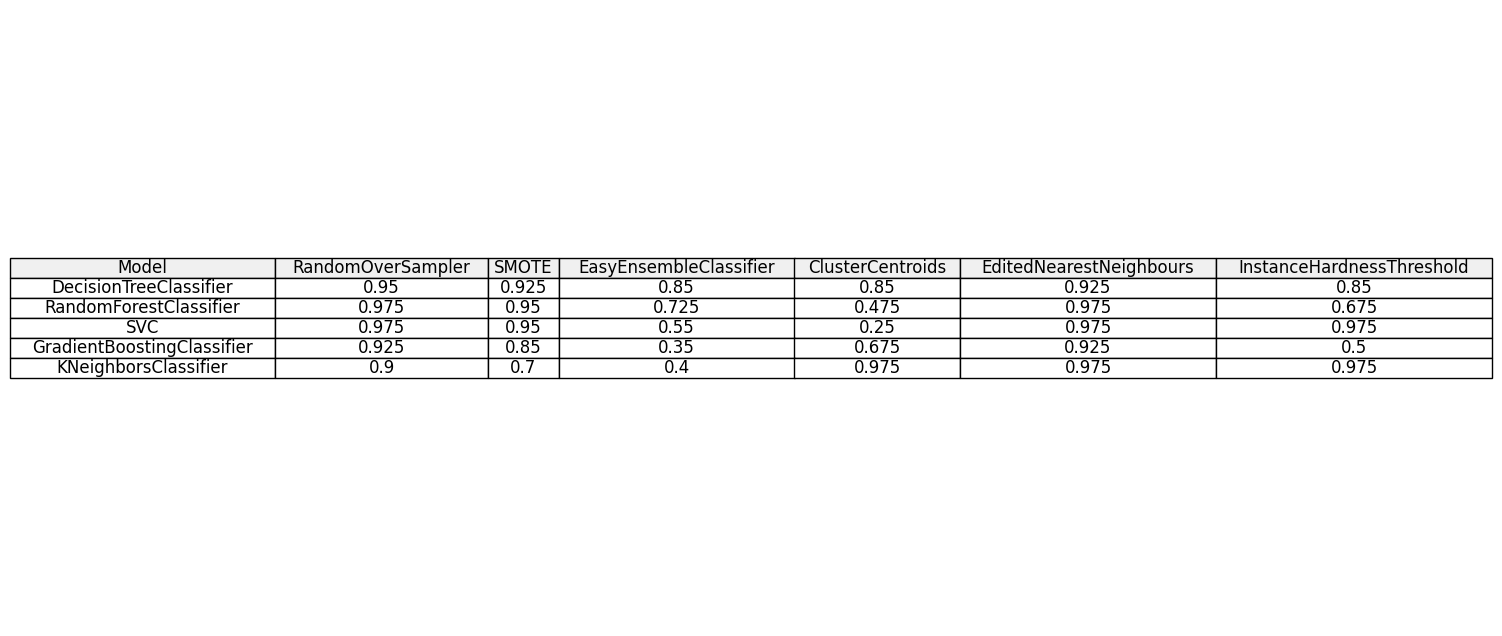

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("accuracy_results.csv")
df = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(12, 8))  

ax.axis('off') 
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', colColours=['#f0f0f0']*df.shape[1])
table.auto_set_font_size(False)
table.set_fontsize(12)  

table.scale(1.2, 1.2)  
table.auto_set_column_width([i for i in range(df.shape[1])])  
plt.savefig('results_table.pdf', bbox_inches='tight')
plt.show()
